In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import ast

In [3]:
data = pd.read_csv("profile_results.csv")
data['times'] = data['times'].apply(ast.literal_eval)
data = data.explode('times', ignore_index=True)
data["times"] = data["times"].apply(pd.to_numeric, errors="coerce")
data


,data_structure,task,size,times
0,array,build,10,0.000004
1,array,build,10,0.000004
2,array,build,10,0.000004
3,array,build,10,0.000004
4,array,build,10,0.000004
...,...,...,...,...
275,trie,find_closest,10000,0.387717
276,trie,find_closest,10000,0.384767
277,trie,find_closest,10000,0.391577
278,trie,find_closest,10000,0.383362


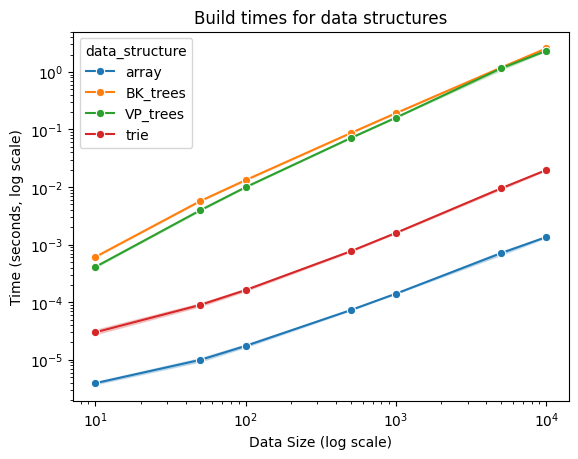

In [12]:
build_times = data[data.task == "build"]

ax = sns.lineplot(
    data=build_times,
    x="size",
    y="times",
    hue="data_structure",
    marker = 'o',
)

plt.xscale("log")
plt.yscale("log")
plt.title("Build times for data structures")
plt.xlabel("Data Size (log scale)")
plt.ylabel("Time (seconds, log scale)")
# plt.savefig("../docs/results.pdf", format="pdf", bbox_inches="tight")
plt.show()

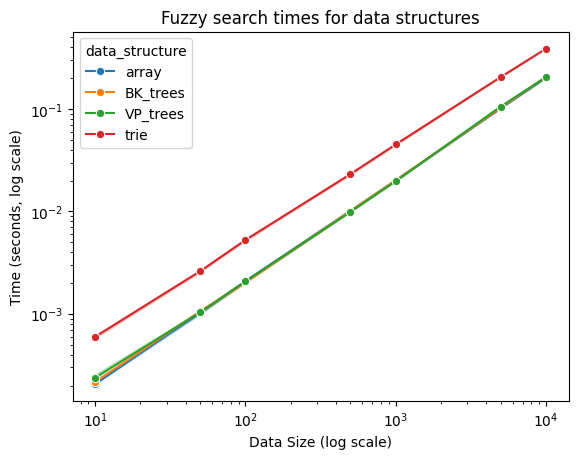

In [16]:
search_times = data[data.task == "find_closest"]

ax = sns.lineplot(
    data=search_times,
    x="size",
    y="times",
    hue="data_structure",
    marker = 'o',
)

plt.xscale("log")
plt.yscale("log")
plt.title("Fuzzy search times for data structures")
plt.xlabel("Data Size (log scale)")
plt.ylabel("Time (seconds, log scale)")
# plt.savefig("../docs/results.pdf", format="pdf", bbox_inches="tight")
plt.show()